In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
Business_account = pd.read_excel("shared_data_read_only/Business Account.xlsx")
Consumer_price_index = pd.read_excel("shared_data_read_only/consumer_price_index.xlsx")
Contacts = pd.read_excel("shared_data_read_only/Contacts.xlsx")
Data_dictionary = pd.read_excel("shared_data_read_only/Data dictionary.xlsx")
Invoice_and_opportunities = pd.read_excel("shared_data_read_only/Invoice and Opportunities.xlsx")
Non_stock_items = pd.read_excel("shared_data_read_only/Non-Stock Items.xlsx")
Items_and_opportunities = pd.read_excel("shared_data_read_only/Items and Opportunities.xlsx")
Opportunities = pd.read_excel("shared_data_read_only/Opportunities.xlsx")

In [43]:
Invoice_and_opportunities = Invoice_and_opportunities.drop_duplicates()

In [44]:
Invoice_and_opportunities['Date'] = pd.to_datetime(Invoice_and_opportunities['Date'])
Invoice_and_opportunities = Invoice_and_opportunities.sort_values(by="Date")

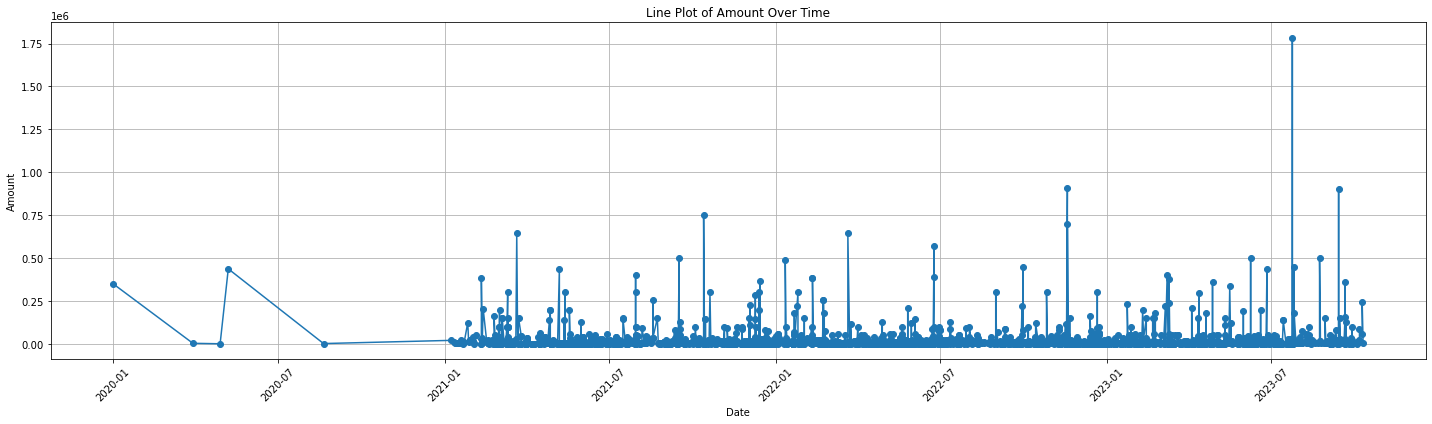

In [45]:
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(Invoice_and_opportunities['Date'], Invoice_and_opportunities['Amount'], marker='o', linestyle='-')
plt.title('Line Plot of Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust plot layout
plt.show()

In [46]:
# Create a boolean mask to filter data between January 2021 and September 2023
mask = (Invoice_and_opportunities['Date'] >= '2021-01-01') & (Invoice_and_opportunities['Date'] <= '2023-09-30')

# Apply the mask to the DataFrame
Invoice_and_opportunities = Invoice_and_opportunities[mask]


In [47]:
# Create a 'donation_month' column to store the year and month for grouping
Invoice_and_opportunities['donation_month'] = Invoice_and_opportunities['Date'].dt.to_period('M')

# Group the DataFrame by 'donation_month' and sum the 'amount' column
monthly_donation_totals = Invoice_and_opportunities.groupby('donation_month')['Amount'].sum().reset_index()

# Optionally, you can sort the DataFrame by 'donation_month' in chronological order
monthly_donation_totals = monthly_donation_totals.sort_values(by='donation_month')

# Rename the columns (optional)
#monthly_donation_totals.columns = ['Donation Month', 'Total Amount']

# Display the resulting DataFrame
#print(monthly_donation_totals)


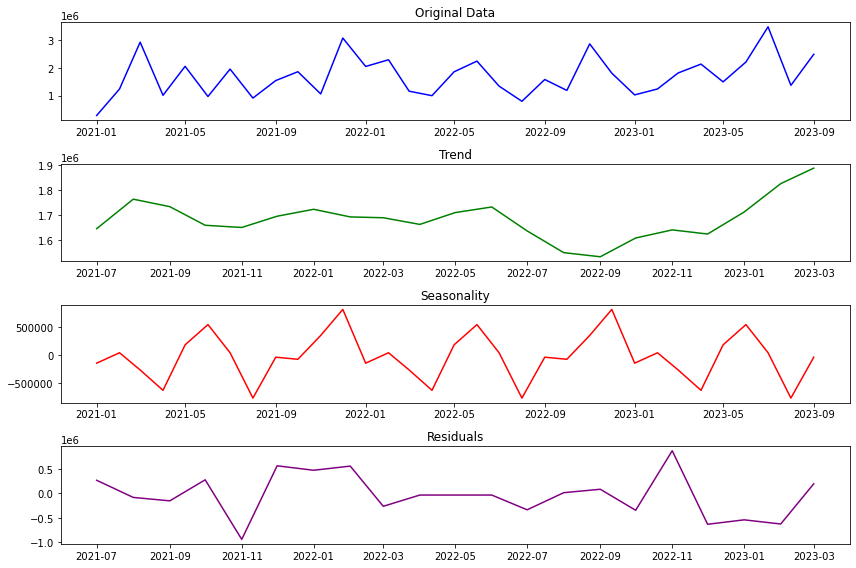

In [48]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with 'date' and 'amount' columns
# Ensure 'date' is in datetime format
monthly_donation_totals['donation_month'] = monthly_donation_totals['donation_month'].dt.to_timestamp()

# Set 'date' as the index of the DataFrame
monthly_donation_totals.set_index('donation_month', inplace=True)

# Perform decomposition
decomposition = sm.tsa.seasonal_decompose(monthly_donation_totals['Amount'], model='additive')

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.title('Original Data')
plt.plot(monthly_donation_totals['Amount'], label='Original', color='blue')

plt.subplot(412)
plt.title('Trend')
plt.plot(decomposition.trend, label='Trend', color='green')

plt.subplot(413)
plt.title('Seasonality')
plt.plot(decomposition.seasonal, label='Seasonal', color='red')

plt.subplot(414)
plt.title('Residuals')
plt.plot(decomposition.resid, label='Residuals', color='purple')

plt.tight_layout()
plt.show()


In [49]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_size = int(0.8 * len(monthly_donation_totals))
train_data = monthly_donation_totals[:train_size]
test_data = monthly_donation_totals[train_size:]


In [50]:
p = 1  # Non-seasonal autoregressive order
d = 1  # Non-seasonal differencing order
q = 1  # Non-seasonal moving average order
P = 1  # Seasonal autoregressive order
D = 1  # Seasonal differencing order
Q = 1  # Seasonal moving average order
S = 12  # Seasonal period (e.g., 12 for monthly data)


In [51]:
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, S))
fitted_model = model.fit(disp=False)  # Set disp=True for detailed output

/opt/tljh/user/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/tljh/user/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/tljh/user/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


In [52]:
forecast_steps = len(test_data)
forecast = fitted_model.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

In [53]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = test_data['Amount']
mse = mean_squared_error(y_true, forecast_mean)
rmse = np.sqrt(mse)


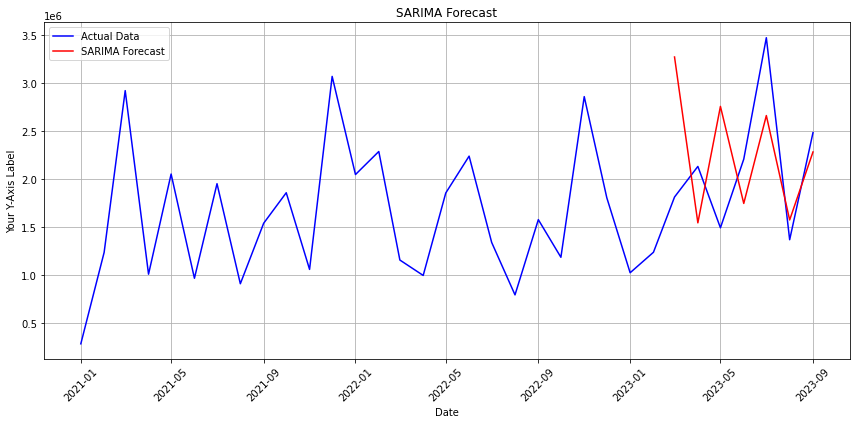

In [54]:
# Plotting the forecast
plt.figure(figsize=(12, 6))  
# Plot actual data
plt.plot(monthly_donation_totals.index, monthly_donation_totals['Amount'], label='Actual Data', color='blue')

# Plot SARIMA forecast
plt.plot(forecast_mean.index, forecast_mean, label='SARIMA Forecast', color='red')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Your Y-Axis Label')
plt.title('SARIMA Forecast')
plt.legend()

# Customize the appearance
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Ensures that all elements fit in the figure
plt.show()


In [57]:
# Fit the SARIMA model on the entire dataset
model = SARIMAX(monthly_donation_totals, order=(p, d, q), seasonal_order=(P, D, Q, S))
fitted_model = model.fit(disp=False)  # Set disp=True for detailed output

# Predict the next 15 months
forecast_steps = 15
forecast = fitted_model.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean


/opt/tljh/user/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/tljh/user/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/tljh/user/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


In [60]:
forecast_mean

2023-10-01    2.499842e+06
2023-11-01    2.201126e+06
2023-12-01    3.447520e+06
2024-01-01    2.605138e+06
2024-02-01    2.905719e+06
2024-03-01    2.366978e+06
2024-04-01    2.127242e+06
2024-05-01    2.722602e+06
2024-06-01    3.020832e+06
2024-07-01    2.704571e+06
2024-08-01    1.835495e+06
2024-09-01    2.655053e+06
2024-10-01    2.409210e+06
2024-11-01    3.468968e+06
2024-12-01    3.136804e+06
Freq: MS, Name: predicted_mean, dtype: float64

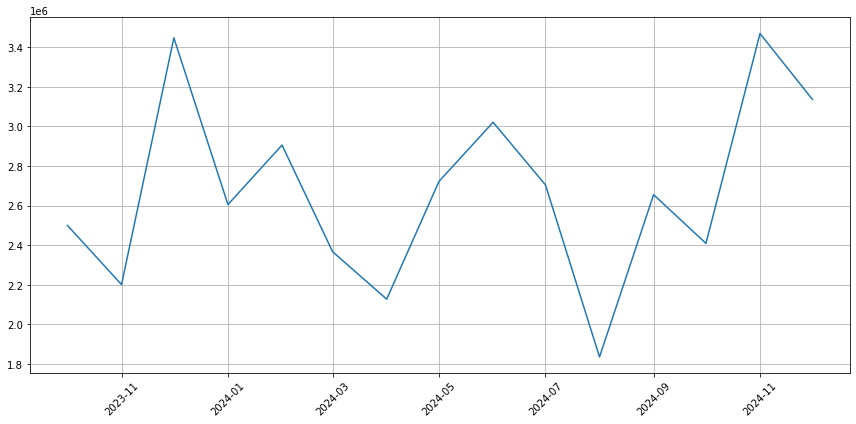

In [62]:
# Plotting the forecast
plt.figure(figsize=(12, 6))  # Adjust the figure size (width, height) as needed

plt.plot(forecast_mean)

# Customize the appearance
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Ensures that all elements fit in the figure
plt.show()
